# Boston Housing Prices
In this project, we will answer the following questions about the Boston Housing dataset and apply an linear regression.

## 1. Read data

### a. Download the Boston Housing Data from Kaggle at:
https://www.kaggle.com/altavish/boston-housing-dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('HousingData.csv')

#### How many rows are in this data set? 506 rows 
#### How many columns are in this data set? 14 columns

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### What do the rows and columns represent?
as we can see in https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html, the meaning of the abbrevations are:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 usd
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's


### c. Are any of the predictors associated with per capita crime rate?  
CRIM - per capita crime rate by town

## 2. Data Preprocessing

### b. Make some pairwise scatterplots of the predictors (columns) in this data set. Describe youe findings.

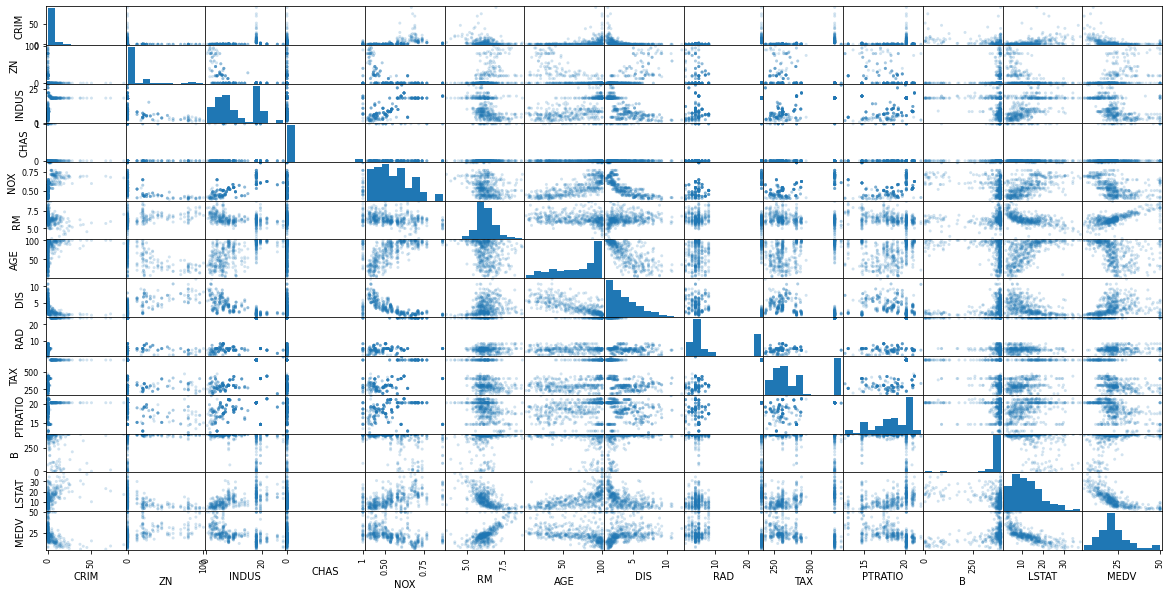

In [35]:
%matplotlib inline
scatter_plot = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,10))

<AxesSubplot:>

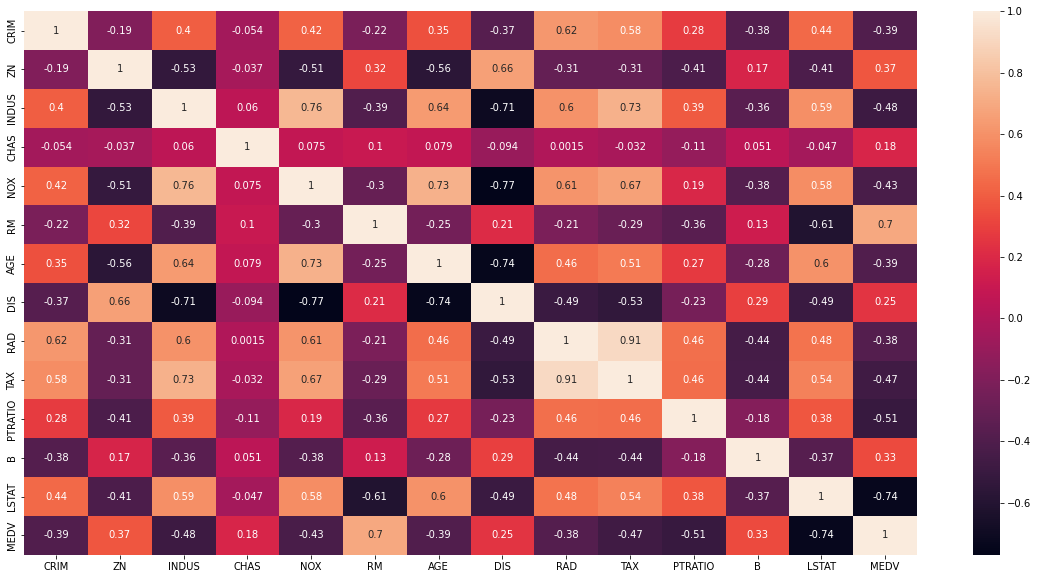

In [36]:
%matplotlib inline
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

Plotting the scatterplot matrix and the heatmap, we can asume:
* In the suburbs where has a large proportion of non-retail business acres per town. 

### d. Do any of the suburbs of Boston appear to have particularly high crime rates?  
No, they tend to have low crime rates  

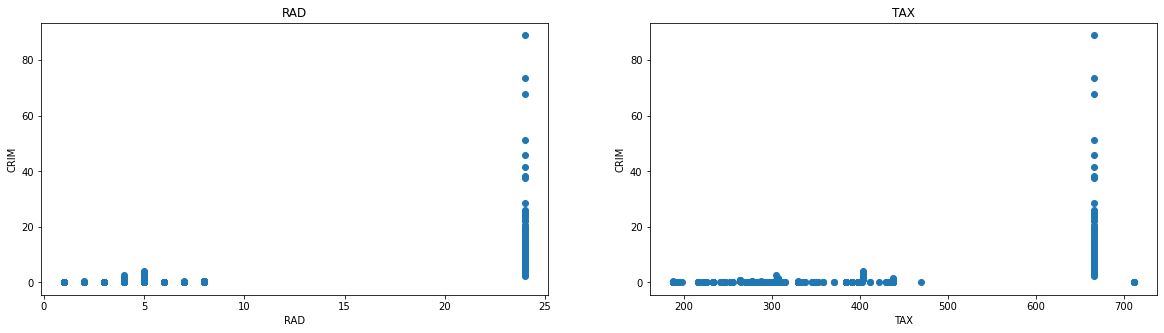

In [37]:
plt.figure(figsize=(20, 5))

features = ['RAD', 'TAX']
target = df['CRIM']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('CRIM')

### d. Do any of the suburbs of Boston appear to have particularly high tax rates?  
The taxes are extreamly high in the suburbs that have more accessibility to radial highways.  
Additionally, the taxes are high if they have access to non-retail business or if the nitric oxides concentration is high.

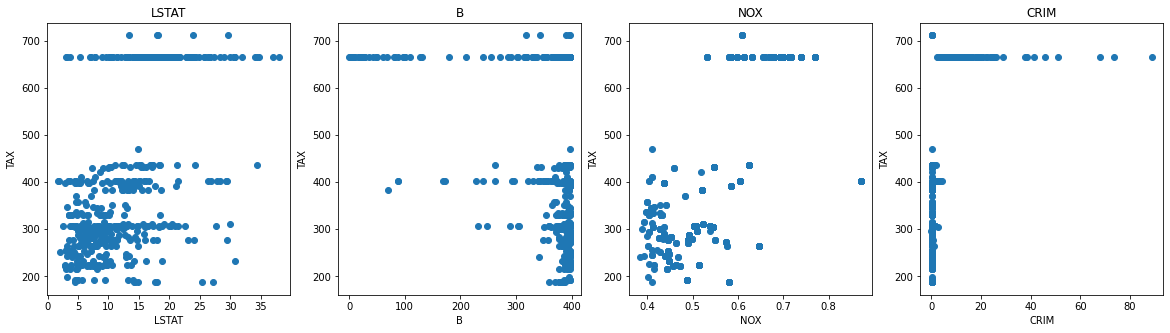

In [38]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'B','NOX','CRIM']
target = df['TAX']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('TAX')

### d. Do any of the suburbs of Boston appear to have particularly high pupil-teacher ratios?  
There is a higher pupil-teacher ratio in the suburbs that pay more taxes.

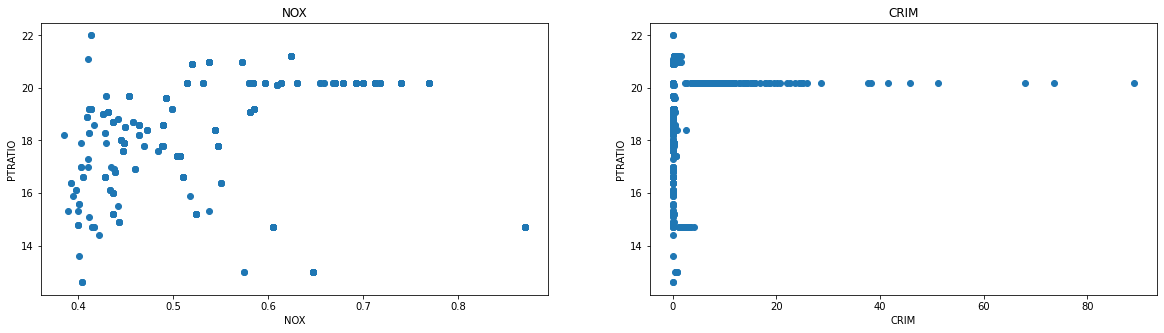

In [39]:
plt.figure(figsize=(20, 5))

features = ['NOX','CRIM']
target = df['PTRATIO']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PTRATIO')

### e. How many of the suburbs in this data set bound the Charles index?

In [40]:
#For knowing hoe many suburbs set bound, i will use the method count, that return how many values are, without counting the NA values.
df.CHAS.count()

486

### f. What is the median pupil-teacher ratio among the towns in this data set? 

In [41]:
#For this, we can just call the method median in the PTRATIO key.
df.PTRATIO.median()

19.05

### g. Which suburb of Boston has lowest median value of owner occupied homes?  
What are the values of the other predictors for that suburb, and how do those values compare 
to the overall ranges for those predictors? Comment on your findings. 

In [42]:
df.MEDV.nsmallest()

398    5.0
405    5.0
400    5.6
399    6.3
414    7.0
Name: MEDV, dtype: float64

In [43]:
df.iloc[[398]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24,666,20.2,396.9,30.59,5.0


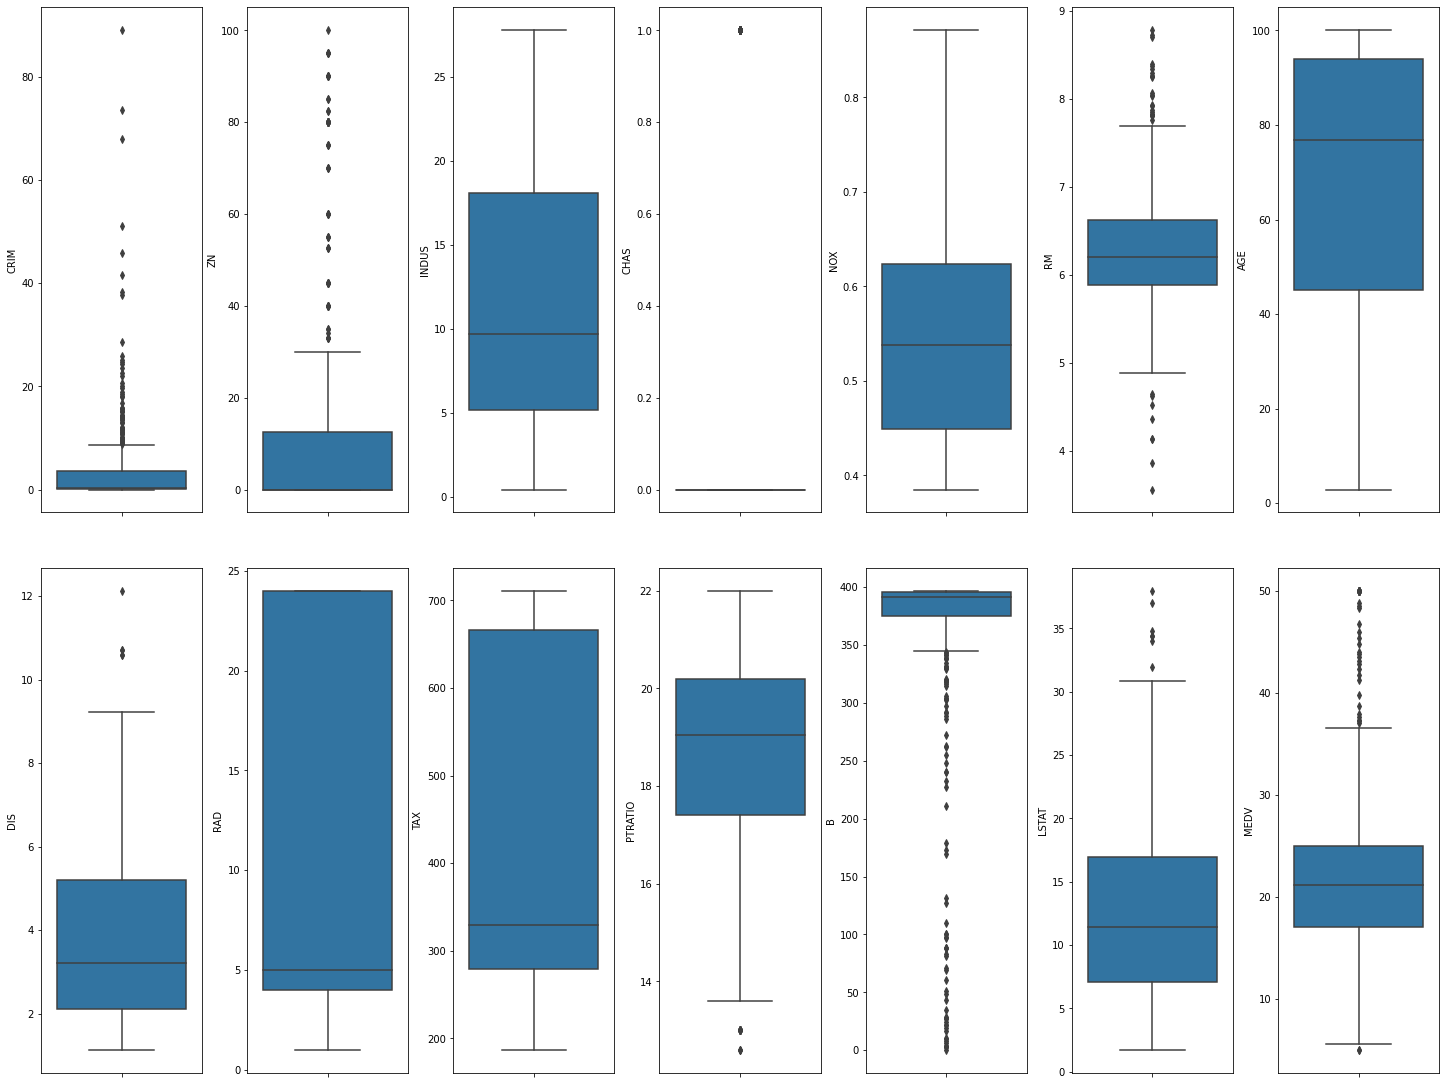

In [44]:
%matplotlib inline
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,15))
index = 0
axs = axs.flatten()

for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Comparing the suburb with index 398 and the boxplot of the dataframe, we have the following findings:
* The crime rate is way too far from the boxplot of the dataframe, making it in a outlier.
* It is one of the oldest suburbs on the dataframe.
* It is one of the suburbs with the biggest percentage of LSTAT on the dataframe. It's still on the interquartile range, but close to the edge.

### h. In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs than average more than eight rooms per dwelling.

In [45]:
rm_count_7 = df[df.RM > 7].RM.count()
rm_count_8 = df[df.RM > 8].RM.count()

print(f'There is {rm_count_7} suburbs that average more than seven rooms.')
print(f'There is {rm_count_8} suburbs that average more than eight rooms.')

There is 64 suburbs that average more than seven rooms.
There is 13 suburbs that average more than eight rooms.


### i. Split the data in training (70%) and test (30%) data, use the linear regression model with the training data, and test it to predict House value.

In [46]:
#Before separate the data, it is necessary to fill the empty spaces and normalize them.
def fill_empty_space(df):
    for col in df.columns:
        if len(df.loc[df[col].isnull()]) != 0:
            df.loc[df[col].isnull(), col] = df[col].median()
                
fill_empty_space(df)

In [47]:
#Then, it is necessary to separate the data from the expected value
X, y = df.drop("MEDV", axis=1), df.MEDV

In [48]:
#Then, lets scale the input
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [49]:
#Then, lets separate the training set form the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### Model Creation

In [50]:
from sklearn.linear_model import LinearRegression
my_model_LinRegression = LinearRegression()

#### Adjust Model with Historic Data

In [51]:
my_model_LinRegression.fit(X_train, y_train)

LinearRegression()

#### Prediction for New Data

In [52]:
y_predict_LinRegression = my_model_LinRegression.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_train_predict = my_model_LinRegression.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)


y_test_predict = my_model_LinRegression.predict(X_test)
# root mean square error of the model
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# r-squared score of the model
r2_test = r2_score(y_test, y_test_predict)

### i. How well did the model perform?  

In [54]:
print("The model performance for training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse_train))
print("R2 score is {}".format(r2_train))
print("\n")

print("The model performance for test set")
print("--------------------------------------")
print("RMSE is {}".format(rmse_test))
print("R2 score is {}".format(r2_test))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.611407596767108
R2 score is 0.7453629919635231


The model performance for test set
--------------------------------------
RMSE is 5.186318525091064
R2 score is 0.6888554656673223




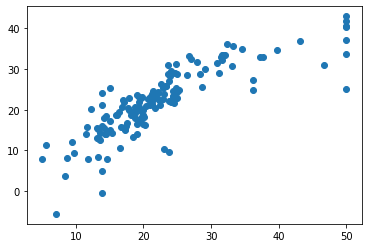

In [55]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict)
plt.show()

### i. How can you improve these results?  
By using diferent variables and trying different models.

### j. We will now try to predict per capita crime rate using the other variables in this data set.  
In other words, per capita crime rate is the response, and the other variables are the predictors. 
For each predictor, individually, fit a simple linear regression model to predict the response. 
Describe your results. In which of the models is there a statistically significant association 
between the predictor and the response? Create some plots to back up your assertions.  
We will take the columns that have some degree of correlation for the first 2 models and columns with none or negative degree of correlation for the last 2 models.

In [56]:
#4 data set with 2 variables
X_2_1 = df[['RAD','TAX']]
X_2_2 = df[['INDUS','NOX']]
X_2_3 = df[['RM','DIS']]
X_2_4 = df[['MEDV','B']]

#4 data set with 3 variables
X_3_1 = df[['NOX','INDUS','AGE']]
X_3_2 = df[['PTRATIO','TAX','RAD']]
X_3_3 = df[['B','ZN','RM']]
X_3_4 = df[['MEDV','DIS','CHAS']]

#4 data set with 4 variables
X_4_1 = df[['AGE','INDUS','RAD','NOX']]
X_4_2 = df[['RAD','TAX','PTRATIO','LSTAT']]
X_4_3 = df[['B','ZN','DIS','RM']]
X_4_4 = df[['RM','CHAS','MEDV','B']]

#only variable with positive correlation
X_pos = df[['INDUS','NOX','AGE','RAD','TAX','PTRATIO','LSTAT']]
#only variable with negative correlation
X_neg = df[['B','RM','ZN','CHAS','DIS','MEDV']]

#1 data set with all variables
X_all, y = df.drop("CRIM", axis=1), df.CRIM

X = [X_2_1, X_2_2, X_2_3, X_2_4, X_3_1, X_3_2, X_3_3, X_3_4,
     X_4_1, X_4_2, X_4_3, X_4_4, X_pos, X_neg ,X_all]

In [57]:
#lets scale the input
from sklearn.preprocessing import StandardScaler
for i in range(len(X)):
    standard_scaler = StandardScaler()
    X[i] = standard_scaler.fit_transform(X[i])

In [58]:
#Then, lets separate the training set form the test set
from sklearn.model_selection import train_test_split
X_train_all = []
X_test_all = []
y_train_all = []
y_test_all = []
for i in range(len(X)):
    X_train, X_test, y_train, y_test = train_test_split(X[i], y, test_size=0.30)
    X_train_all.append(X_train)
    X_test_all.append(X_test)
    y_train_all.append(y_train)
    y_test_all.append(y_test)

#### Model Creation

In [59]:
from sklearn.linear_model import LinearRegression
my_model_LinRegression = LinearRegression()

#### Adjust Model with Historic Data

In [60]:
my_model_LinRegression_all = []
for i in range(len(X_train_all)):
    my_model_LinRegression = None
    my_model_LinRegression = LinearRegression()
    my_model_LinRegression.fit(X_train_all[i], y_train_all[i])
    my_model_LinRegression_all.append(my_model_LinRegression)

#### Prediction for New Data

In [61]:
y_predict_LinRegression_all = []
for i in range(len(X_test_all)):
    y_predict_LinRegression = None
    y_predict_LinRegression = my_model_LinRegression_all[i].predict(X_test_all[i])
    y_predict_LinRegression_all.append(y_predict_LinRegression)

#### Create measurements

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_train_all = []
r2_train_all = []
rmse_test_all = []
r2_test_all = []
y_test_predict_all = []
for i in range(len(X_train_all)):
    y_train_predict = None
    y_test_predict = None
    y_train_predict = my_model_LinRegression_all[i].predict(X_train_all[i])
    y_test_predict = my_model_LinRegression_all[i].predict(X_test_all[i])
    # root mean square error of the model
    rmse_train = (np.sqrt(mean_squared_error(y_train_all[i], y_train_predict)))
    rmse_test = (np.sqrt(mean_squared_error(y_test_all[i], y_test_predict)))
    # r-squared score of the model
    r2_train = r2_score(y_train_all[i], y_train_predict)
    r2_test = r2_score(y_test_all[i], y_test_predict)
    rmse_train_all.append(rmse_train)
    r2_train_all.append(r2_train)
    rmse_test_all.append(rmse_test)
    r2_test_all.append(r2_test)
    y_test_predict_all.append(y_test_predict)   

In [63]:
data = [rmse_train_all, rmse_test_all, r2_train_all, r2_test_all]
col_name = ['X_2_1', 'X_2_2', 'X_2_3', 'X_2_4', 'X_3_1', 'X_3_2', 
       'X_3_3', 'X_3_4', 'X_4_1', 'X_4_2', 'X_4_3', 'X_4_4', 'X_pos','X_neg','X_all']

pd.DataFrame(data, columns = col_name,
             index=["Training set RMSE","Test set RMSE", "Training set R2","Test set R2"])

,X_2_1,X_2_2,X_2_3,X_2_4,X_3_1,X_3_2,X_3_3,X_3_4,X_4_1,X_4_2,X_4_3,X_4_4,X_pos,X_neg,X_all
Training set RMSE,7.642756,7.139283,8.445961,8.265326,8.061209,7.637963,8.103230,8.043832,6.871139,7.026581,7.619905,7.758101,6.853458,7.885535,6.004928
Test set RMSE,4.472654,8.987120,6.385772,5.802915,6.835788,4.483781,7.085722,6.193777,6.658766,5.743943,7.335960,7.256582,6.180613,5.726805,7.679519
Training set R2,0.350630,0.182665,0.131108,0.196822,0.178236,0.347527,0.151383,0.209080,0.361675,0.375730,0.260022,0.216883,0.365357,0.271741,0.438657
Test set R2,0.387567,0.180565,0.227954,0.265114,0.215546,0.414586,0.213068,0.283362,0.382415,0.448562,0.122307,0.189108,0.464074,0.258832,0.375308


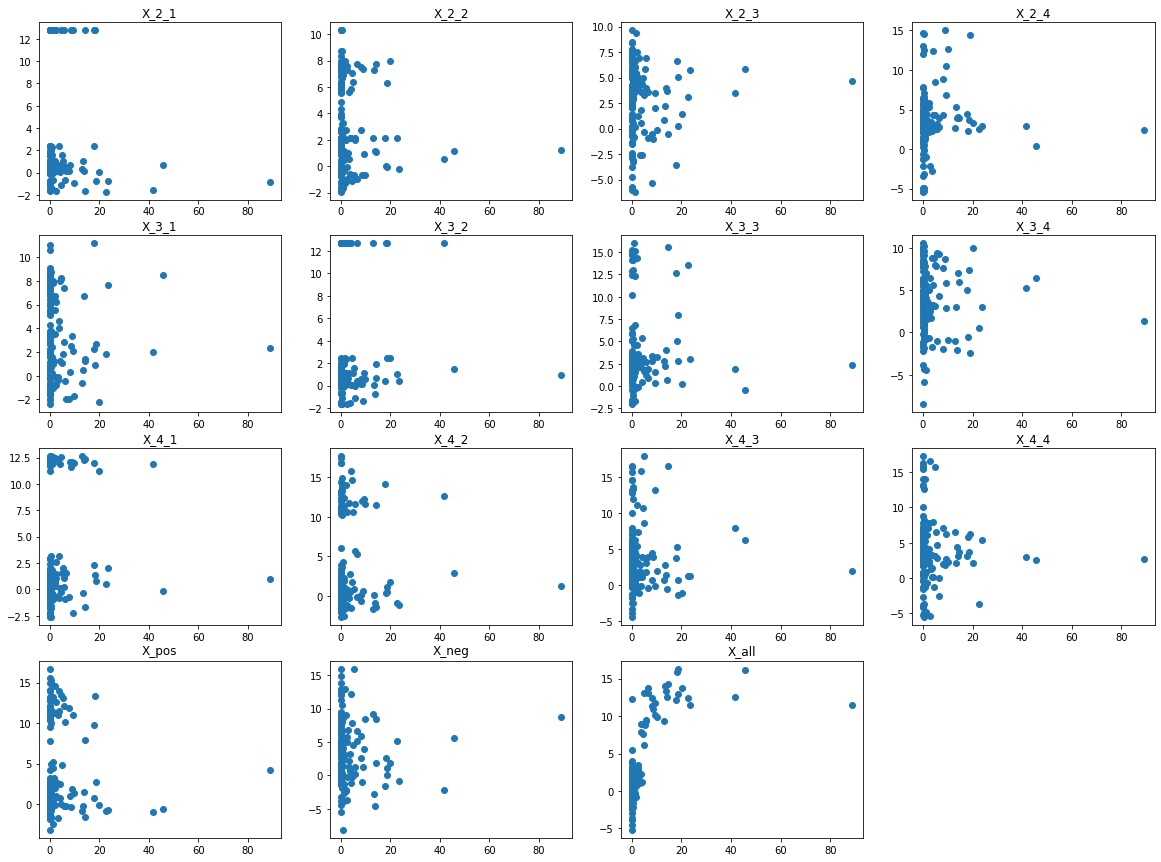

In [64]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.figure(figsize=(20, 15))
row = 4
for i, col in enumerate(y_test_predict_all):
    plt.subplot(row, len(y_test_predict_all)//4 + 1 , i+1)
    plt.title(col_name[i])
    plt.scatter(y_test, y_test_predict_all[i])
    

### k. Fit a multiple regression model to predict the response using all the predictors.    
##### For which predictors can we get the best results?  
The best result was archieved by the model using anly the columns with positive correlation values
##### Which predictors can be eliminated?   
All the predictors with negative correlation value

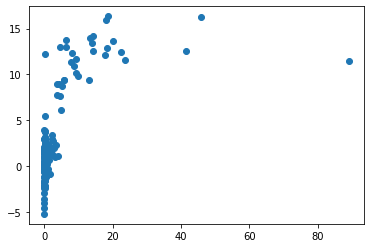

In [65]:
plt.scatter(y_test, y_test_predict)
plt.show()

### l. How do your results from (j) compare to your results from (k)?  
The result from the model that have all predictors was 52% and the model only using the predictors with a positive correlation valua was 59%. Those were the best models.